In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/'

/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings


In [ ]:
!pip install keras==1.2.2
# !pip install keras==2.0.2

     |████████████████████████████████| 184kB 3.5MB/s 
  Created wheel for keras: filename=Keras-1.2.2-cp36-none-any.whl size=209603 sha256=e1c8193a6dda75f62903db08b00496f627d0a2e6b5f207fd6617965e58d5d417
  Stored in directory: /root/.cache/pip/wheels/55/07/cf/b32db0a8d243b2fd6759d5d7cb650aa20670b2b740209cbf7e
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 1.2.2 which is incompatible.
ERROR: kapre 0.1.3.1 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [ ]:
!pip install tensorflow==0.12.1
# !pip install tensorflow==1.13.1

     |████████████████████████████████| 43.1MB 38.7MB/s 
ERROR: stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but you'll have tensorflow 0.12.1 which is incompatible.
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 0.12.1 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement keras>=2.0.0, but you'll have keras 1.2.2 which is incompatible.
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [ ]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from tqdm import tqdm
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector, Merge, Activation, Flatten
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
import nltk
from vgg16 import VGG16

Using TensorFlow backend.


In [ ]:
token = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Text/Flickr8k.token.txt'

In [ ]:
captions = open(token, 'r').read().strip().split('\n')

## Creating a dictionary containing all the captions of the images

In [ ]:
d = {}
for i, row in enumerate(captions):
    row = row.split('\t')
    row[0] = row[0][:len(row[0])-2]
    if row[0] in d:
        d[row[0]].append(row[1])
    else:
        d[row[0]] = [row[1]]

In [ ]:
d['1000268201_693b08cb0e.jpg']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
images = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/'

In [ ]:
# Contains all the images
img = glob.glob(images+'*.jpg')

In [ ]:
img[:5]

['/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/2665461736_595c87f0a3.jpg',
 '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/3662871327_b128d25f04.jpg',
 '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/976392326_082dafc3c5.jpg',
 '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/3215117062_6e07a86352.jpg',
 '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/3286045254_696c6b15bd.jpg']

In [ ]:
train_images_file = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Text/Flickr_8k.trainImages.txt'

In [ ]:
train_images = set(open(train_images_file, 'r').read().strip().split('\n'))

In [ ]:
def split_data(l):
    temp = []
    for i in img:
        if i[len(images):] in l:
            temp.append(i)
    return temp

In [ ]:
# Getting the training images from all the images
train_img = split_data(train_images)
len(train_img)

6000

In [ ]:
val_images_file = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Text/Flickr_8k.devImages.txt'
val_images = set(open(val_images_file, 'r').read().strip().split('\n'))

In [ ]:
# Getting the validation images from all the images
val_img = split_data(val_images)
len(val_img)

1000

In [ ]:
test_images_file = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Text/Flickr_8k.testImages.txt'
test_images = set(open(test_images_file, 'r').read().strip().split('\n'))

In [ ]:
# Getting the testing images from all the images
test_img = split_data(test_images)
len(test_img)

1000

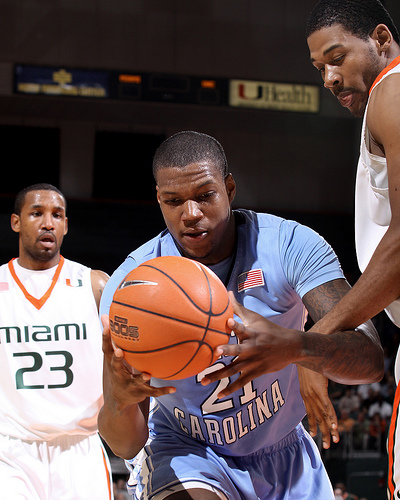

In [ ]:
Image.open(train_img[4])

We will feed these images to VGG-16 or IncepptionV3 to get the encoded images. Hence we need to preprocess the images as the authors of VGG-16 did. The last layer of VGG-16 is the softmax classifier(FC layer with 1000 hidden neurons) which returns the probability of a class. This layer should be removed so as to get a feature representation of an image. We will use the last Dense layer(4096 hidden neurons) after popping the classifier layer. Hence the shape of the encoded image will be (1, 4096) and in case of Inception V3 model the shape of encoded image will be (1, 2048)

In [ ]:
def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

In [ ]:
def preprocess(image_path):
    img = image.load_img(image_path, target_size=(299,299,3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
#     plt.imshow(np.squeeze(x/255))
#     print("here")
    x = preprocess_input(x)
    return x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


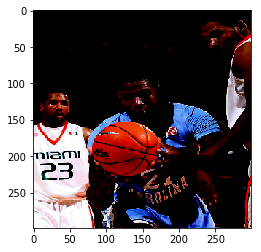

In [ ]:
plt.imshow(np.squeeze(preprocess(train_img[4])))

In [ ]:
model = InceptionV3(weights='imagenet')
# model = VGG16(weights='imagenet', include_top=True, input_shape = (224, 224, 3))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 149, 149, 32)  896         input_1[0][0]                    
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 149, 149, 32)  128         convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 147, 147, 32)  9248        batchnormalization_1[0][0]       
___________________________________________________________________________________________

In [ ]:
from keras.models import Model

new_input = model.input
print(new_input)
hidden_layer = model.layers[-2].output
print(hidden_layer)
model_new = Model(new_input, hidden_layer)

# model_new.summary()

Tensor("input_1:0", shape=(?, 299, 299, 3), dtype=float32)
Tensor("Reshape_846:0", shape=(?, ?), dtype=float32)


In [ ]:
tryi = model_new.predict(preprocess(train_img[4]))

In [ ]:
tryi

array([[-0.33111745, -0.2882212 , -0.05906535, ..., -0.02976041,
        -0.19596517, -0.21389808]], dtype=float32)

In [ ]:
def encode(image):
    image = preprocess(image)
    temp_enc = model_new.predict(image)
    temp_enc = np.reshape(temp_enc, temp_enc.shape[1])
    return temp_enc

In [ ]:
# encoding_train = {}
# for img in tqdm(train_img):
#     encoding_train[img[len(images):]] = encode(img)

 40%|████      | 2416/6000 [53:28<1:20:20,  1.34s/it]

In [ ]:
# with open("VGG16_Encoding_Train.p", "wb") as encoded_pickle:
#     pickle.dump(encoding_train, encoded_pickle) 
# # with open("encoded_images_inceptionV3.p", "wb") as encoded_pickle:
# #     pickle.dump(encoding_train, encoded_pickle) 

In [ ]:
encoding_train = pickle.load(open('InceptionV3_Encoding_Train.p', 'rb'))
# encoding_train = pickle.load(open('encoded_images_inceptionV3.p', 'rb'))
# encoding_train = pickle.load(open('image_encodings.p', 'rb'))

In [ ]:
encoding_train['3556792157_d09d42bef7.jpg'].shape

(2048,)

In [ ]:
# encoding_test = {}
# for img in tqdm(test_img):
#     encoding_test[img[len(images):]] = encode(img)

In [ ]:
# with open("VGG16_Encoding_Test.p", "wb") as encoded_pickle:
#     pickle.dump(encoding_test, encoded_pickle) 
# # with open("encoded_images_test_inceptionV3.p", "wb") as encoded_pickle:
# #     pickle.dump(encoding_test, encoded_pickle) 

In [ ]:
encoding_test = pickle.load(open('InceptionV3_Encoding_Test.p', 'rb'))
# encoding_test = pickle.load(open('encoded_images_test_inceptionV3.p', 'rb'))

In [ ]:
encoding_test[test_img[0][len(images):]].shape

(2048,)

In [ ]:
train_d = {}
for i in train_img:
    if i[len(images):] in d:
        train_d[i] = d[i[len(images):]]

In [ ]:
len(train_d)

6000

In [ ]:
train_d[images+'3556792157_d09d42bef7.jpg']

['A bunch of children sitting in chairs and standing on wooden floors .',
 'A group of children sit , stand , and kneel along a wall .',
 'A group of children sitting on folding chairs and playing .',
 'a young group of children sitting in a row against the wall .',
 'The kids talking while sitting on a row of chairs along the wall .']

In [ ]:
val_d = {}
for i in val_img:
    if i[len(images):] in d:
        val_d[i] = d[i[len(images):]]

In [ ]:
len(val_d)

1000

In [ ]:
test_d = {}
for i in test_img:
    if i[len(images):] in d:
        test_d[i] = d[i[len(images):]]

In [ ]:
len(test_d)

1000

Calculating the unique words in the vocabulary.

In [ ]:
caps = []
for key, val in train_d.items():
    for i in val:
        caps.append('<start> ' + i + ' <end>')

In [ ]:
words = [i.split() for i in caps]

In [ ]:
# unique = []
# for i in words:
#     unique.extend(i)

In [ ]:
# unique = list(set(unique))

In [ ]:
# with open("unique.p", "wb") as pickle_d:
#     pickle.dump(unique, pickle_d) 

In [ ]:
unique = pickle.load(open('unique.p', 'rb'))

In [ ]:
len(unique)

8256

Mapping the unique words to indices and vice-versa

In [ ]:
word2idx = {val:index for index, val in enumerate(unique)}

In [ ]:
word2idx['<start>']

5553

In [ ]:
idx2word = {index:val for index, val in enumerate(unique)}

In [ ]:
idx2word[5553]

'<start>'

In [ ]:
word2idx['<end>']

5232

Calculating the maximum length among all the captions

In [ ]:
max_len = 0
for c in caps:
    c = c.split()
    if len(c) > max_len:
        max_len = len(c)
max_len

40

In [ ]:
len(unique), max_len

(8256, 40)

In [ ]:
vocab_size = len(unique)

In [ ]:
vocab_size

8256

Adding <start> and <end> to all the captions to indicate the starting and ending of a sentence. This will be used while we predict the caption of an image

In [ ]:
f = open('flickr8k_training_dataset.txt', 'w')
f.write("image_id\tcaptions\n")

18

In [ ]:
for key, val in train_d.items():
    for i in val:
        f.write(key[len(images):] + "\t" + "<start> " + i +" <end>" + "\n")

f.close()

In [ ]:
df = pd.read_csv('flickr8k_training_dataset.txt', delimiter='\t')

In [ ]:
len(df)

30000

In [ ]:
c = [i for i in df['captions']]
len(c)

30000

In [ ]:
imgs = [i for i in df['image_id']]

In [ ]:
a = c[-1]
a, imgs[-1]

('<start> A white rally car is throwing mud into the air as it approaches a bend in the track . <end>',
 '2528521798_fb689eba8d.jpg')

In [ ]:
for i in a.split():
    print (i, "=>", word2idx[i])

<start> => 5553
A => 4228
white => 2970
rally => 6109
car => 4409
is => 5279
throwing => 4889
mud => 2394
into => 1937
the => 7392
air => 2205
as => 3542
it => 6429
approaches => 6567
a => 32
bend => 3019
in => 8156
the => 7392
track => 3462
. => 7023
<end> => 5232


In [ ]:
samples_per_epoch = 0
for ca in caps:
    samples_per_epoch += len(ca.split())-1

In [ ]:
samples_per_epoch

383454

## Generator 

We will use the encoding of an image and use a start word to predict the next word.
After that, we will again use the same image and use the predicted word 
to predict the next word.
So, the image will be used at every iteration for the entire caption. 
This is how we will generate the caption for an image. Hence, we need to create 
a custom generator for that.

The CS231n lecture by Andrej Karpathy explains this concept very clearly and beautifully.
Link for the lecture:- https://youtu.be/cO0a0QYmFm8?t=32m25s

In [ ]:
def data_generator(batch_size = 32):
        partial_caps = []
        next_words = []
        images = []
        
        df = pd.read_csv('flickr8k_training_dataset.txt', delimiter='\t')
        df = df.sample(frac=1)
        iter = df.iterrows()
        c = []
        imgs = []
        for i in range(df.shape[0]):
            x = next(iter)
            c.append(x[1][1])
            imgs.append(x[1][0])
        


        count = 0
        while True:
            for j, text in enumerate(c):
                current_image = encoding_train[imgs[j]]
                for i in range(len(text.split())-1):
                    count+=1
                    
                    partial = [word2idx[txt] for txt in text.split()[:i+1]]
                    partial_caps.append(partial)
                    
                    # Initializing with zeros to create a one-hot encoding matrix
                    # This is what we have to predict
                    # Hence initializing it with vocab_size length
                    n = np.zeros(vocab_size)
                    # Setting the next word to 1 in the one-hot encoded matrix
                    n[word2idx[text.split()[i+1]]] = 1
                    next_words.append(n)
                    
                    images.append(current_image)

                    if count>=batch_size:
                        next_words = np.asarray(next_words)
                        images = np.asarray(images)
                        partial_caps = sequence.pad_sequences(partial_caps, maxlen=max_len, padding='post')
                        yield [[images, partial_caps], next_words]
                        partial_caps = []
                        next_words = []
                        images = []
                        count = 0

In [ ]:
# data_generator(128)

## Let's create the model

In [ ]:
embedding_size = 300

Input dimension is 2048 for inception v3 and 4096 for VGG16 since we will feed it the encoded version of the image.

In [ ]:
image_model = Sequential([
        Dense(embedding_size, input_shape=(2048,), activation='relu'), # input_shape=(4096,) for VGG16
        RepeatVector(max_len) #repeat input 40 times bcz max_len = 40
    ])

Since we are going to predict the next word using the previous words(length of previous words changes with every iteration over the caption), we have to set return_sequences = True.

In [ ]:
caption_model = Sequential([
        Embedding(vocab_size, embedding_size, input_length=max_len), #converts positive integers into dence vectors
        LSTM(256, return_sequences=True), #256 = dimentionality of output space
        TimeDistributed(Dense(300)) #This wrapper applies a layer to every temporal slice of an input.
    ])

Merging the models and creating a softmax classifier

In [ ]:
final_model = Sequential([
        Merge([image_model, caption_model], mode='concat', concat_axis=1),
        Bidirectional(LSTM(256, return_sequences=False)),
        Dense(vocab_size),
        Activation('softmax')
    ])

In [ ]:
final_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
final_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 300)           614700                                       
____________________________________________________________________________________________________
repeatvector_1 (RepeatVector)    (None, 40, 300)       0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 40, 300)       2476800                                      
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 40, 256)       570368                                       
___________________________________________________________________________________________

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch1.h5')

In [ ]:
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch1.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch2.h5')

In [ ]:
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch2.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch3.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch3.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch4.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch4.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch5.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch5.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch6.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch6.h5')

In [ ]:
# final_model.optimizer.lr = 1e-4
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch7.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch7.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch8.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch8.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch9.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch9.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch10.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch10.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch11.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch11.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch12.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch12.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch13.h5')
# final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epoch13.h5')

In [ ]:
# final_model.fit_generator(data_generator(batch_size=128), samples_per_epoch=samples_per_epoch//batch_size, nb_epoch=1, 
#                           verbose=1)

In [ ]:
# final_model.save_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epo14.h5')

In [ ]:
final_model.load_weights('/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/weights/epo14.h5')

## Predict funtion

In [ ]:
def beam_search_predictions(image, beam_index = 3):
    start = [word2idx["<start>"]]
    
    start_word = [[start, 0.0]]
    
    while len(start_word[0][0]) < max_len:
        temp = []
        for s in start_word:
            par_caps = sequence.pad_sequences([s[0]], maxlen=max_len, padding='post')
            e = encoding_test[image[len(images):]]
#             e = encode(image)
            preds = final_model.predict([np.array([e]), np.array(par_caps)])
            
            word_preds = np.argsort(preds[0])[-beam_index:]
            
            # Getting the top <beam_index>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        start_word = start_word[-beam_index:]
    
    start_word = start_word[-1][0]
    intermediate_caption = [idx2word[i] for i in start_word]

    final_caption = []
    
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
        else:
            break
    
    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [ ]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word2idx[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        e = encoding_test[image[len(images):]]
#         e = encode(image)
        preds = final_model.predict([np.array([e]), np.array(par_caps)])
        word_pred = idx2word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

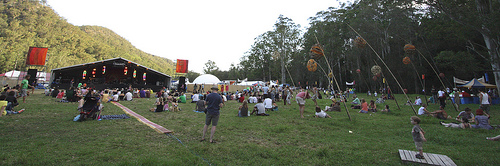

In [ ]:
try_image = test_img[0]
Image.open(try_image)

In [ ]:
print ('Normal Max search:', predict_captions(try_image)) 
print ('Beam Search, k=3:', beam_search_predictions(try_image, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(try_image, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(try_image, beam_index=7))

Normal Max search: A group of people are gathered outside a lake .
Beam Search, k=3: A group of people play a game in the street , as a crowd watches .
Beam Search, k=5: A group of people play a game in the street , as a crowd watches .
Beam Search, k=7: many people walk in the grass at the night


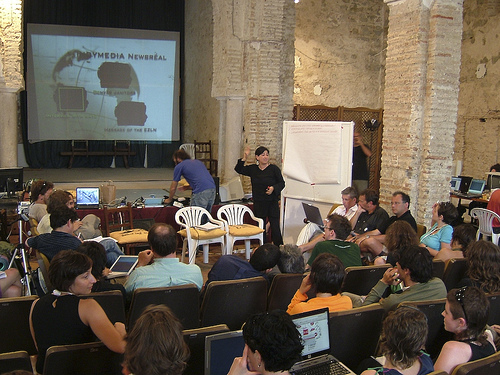

In [ ]:
try_image2 = test_img[7]
Image.open(try_image2)

In [ ]:
print ('Normal Max search:', predict_captions(try_image2)) 
print ('Beam Search, k=3:', beam_search_predictions(try_image2, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(try_image2, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(try_image2, beam_index=7))

Normal Max search: A man is sitting at an outside bar near many people .
Beam Search, k=3: A crowd of people are sitting in the street .
Beam Search, k=5: A group of people gather around a truck .
Beam Search, k=7: Some people are looking at pictures at an event .


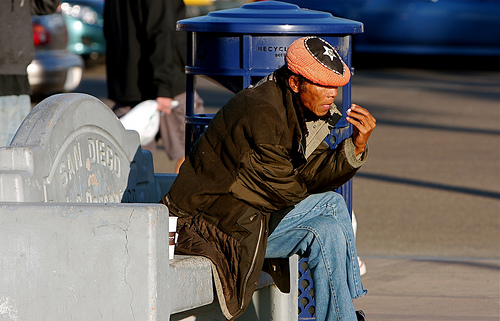

In [ ]:
try_image3 = test_img[851]
Image.open(try_image3)

In [ ]:
print ('Normal Max search:', predict_captions(try_image3)) 
print ('Beam Search, k=3:', beam_search_predictions(try_image3, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(try_image3, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(try_image3, beam_index=7))

Normal Max search: A young man wearing a hat is sitting on the ground with a blue blanket over his ground .
Beam Search, k=3: A young man wearing a hat is sitting on the ground with a small bag .
Beam Search, k=5: A child wearing a hat is sitting on the ground with a white bag in his hand .
Beam Search, k=7: A person wearing a hat and hat talks to another child in the park .


Normal Max search: A person on a bike is coming up through the mud .
Beam Search, k=3: A guy is doing a trick on a bike .
Beam Search, k=5: A mountain biker jumps a rock on a mountain .
Beam Search, k=7: A mountain biker is riding on a line back at bushes .


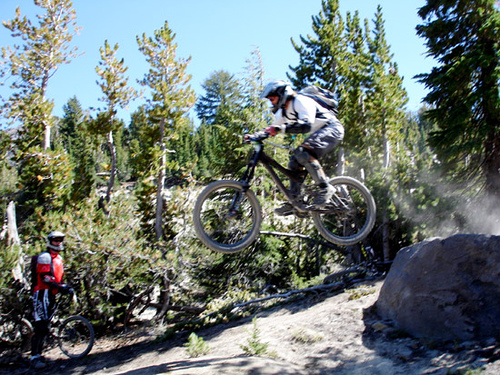

In [ ]:
try_image4 = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/136552115_6dc3e7231c.jpg'
print ('Normal Max search:', predict_captions(try_image4))
print ('Beam Search, k=3:', beam_search_predictions(try_image4, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(try_image4, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(try_image4, beam_index=7))
Image.open(try_image4)

Normal Max search: A dog is jumping in the air to catch something .
Beam Search, k=3: A brown dog is jumping in the air .
Beam Search, k=5: A dog is jumping in the air to catch something .
Beam Search, k=7: A dog in a harness holds a stick in his mouth while standing in the grass .


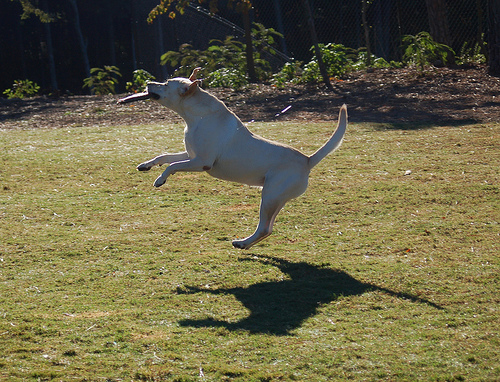

In [ ]:
im = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/1674612291_7154c5ab61.jpg'
print ('Normal Max search:', predict_captions(im))
print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
Image.open(im)

Normal Max search: A tan dog runs through the snow .
Beam Search, k=3: A tan dog runs through the snow .
Beam Search, k=5: A tan dog runs through the snow .
Beam Search, k=7: Brown dog running through snow .


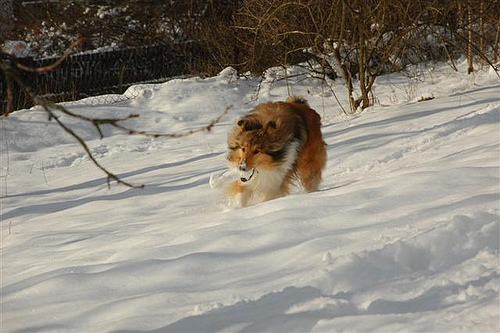

In [ ]:
im = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/384577800_fc325af410.jpg'
print ('Normal Max search:', predict_captions(im))
print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
Image.open(im)

Normal Max search: A man is riding a surfboard
Beam Search, k=3: A man rides a wave on a surfboard .
Beam Search, k=5: A man rides a surfboard as a wave makes a splash .
Beam Search, k=7: A man rides a surfboard as a wave makes a splash .


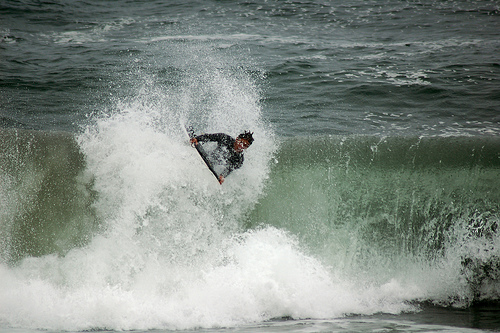

In [ ]:
im = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/3631986552_944ea208fc.jpg'
print ('Normal Max search:', predict_captions(im))
print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
Image.open(im)

Normal Max search: A little girl in a red coat plays in snow .
Beam Search, k=3: A little kid plays in the snow in a brown jacket and red shorts on a harness .
Beam Search, k=5: Little girl in red coat going down a hill .
Beam Search, k=7: Little girl in red coat going down a hill .


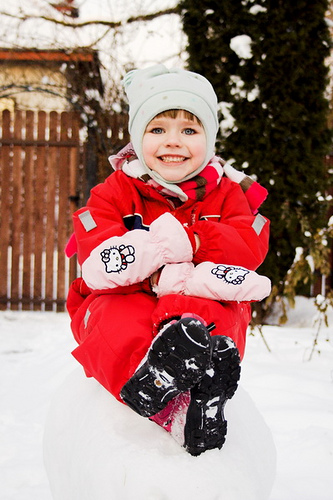

In [ ]:
im = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/3320032226_63390d74a6.jpg'
print ('Normal Max search:', predict_captions(im))
print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
Image.open(im)

Normal Max search: A man rides a bicycle on a trail down a river .
Beam Search, k=3: A man is riding a bicycle on a trail through some trees .
Beam Search, k=5: A man rides a mountain bike down a slope in the woods .
Beam Search, k=7: A man rides a bicycle on a trail down a river .


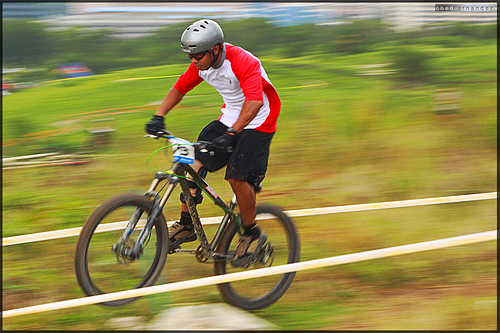

In [ ]:
im = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/3316725440_9ccd9b5417.jpg'
print ('Normal Max search:', predict_captions(im))
print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
Image.open(im)

Normal Max search: A skateboarder in the air in front of a red slide .
Beam Search, k=3: A skateboarder in the air in front of a blue building .
Beam Search, k=5: A skateboarder in the air in front of a blue building .
Beam Search, k=7: A male skateboarder is skating in a skate park .


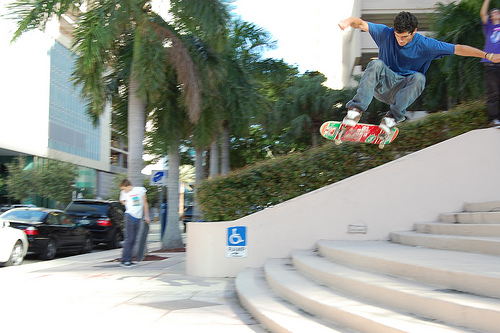

In [ ]:
im = '/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/2306674172_dc07c7f847.jpg'
print ('Normal Max search:', predict_captions(im))
print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
Image.open(im)

In [ ]:
# im = '/content/gdrive/My Drive/Semester 6/MP 3/nirma.jpg'
# print ('Normal Max search:', predict_captions(im))
# print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
# print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
# print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
# Image.open(im)

In [ ]:
# im = '/content/gdrive/My Drive/Semester 6/MP 3/chhotu.jpg'
# print ('Normal Max search:', predict_captions(im))
# # print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
# # print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
# # print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
# Image.open(im)

/content/gdrive/My Drive/Semester 6/MP 3/Temp/testings/Flickr8K_Data/2950905787_f2017d3e49.jpg
Normal Max search: A hiker stands on a mountain and hangs up in the air .
Beam Search, k=3: A hiker stands on a hill looking into the distance .
Beam Search, k=5: There is a kid standing in front of a bull looking up .
Beam Search, k=7: A hiker looks out at the ocean 's sea .


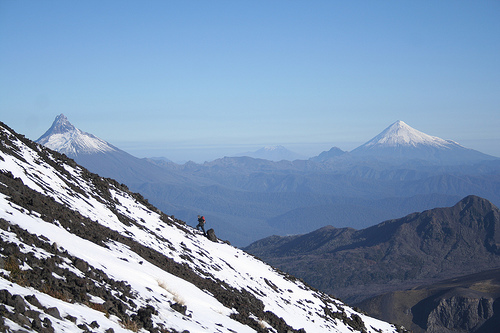

In [ ]:
im = test_img[int(np.random.randint(0, 1000, size=1))]
print (im)
print ('Normal Max search:', predict_captions(im))
print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
Image.open(im)

In [ ]:
# im = '/content/gdrive/My Drive/Semester 6/MP 3/nirma1.jpg'
# print ('Normal Max search:', predict_captions(im))
# print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
# print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
# print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
# Image.open(im)

In [ ]:
# im = '/content/gdrive/My Drive/Semester 6/MP 3/julie1.jpg'
# print ('Normal Max search:', predict_captions(im))
# print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
# print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
# print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
# Image.open(im)

In [ ]:
# im = '/content/gdrive/My Drive/Semester 6/MP 3/julie2.jpg'
# print ('Normal Max search:', predict_captions(im))
# print ('Beam Search, k=3:', beam_search_predictions(im, beam_index=3))
# print ('Beam Search, k=5:', beam_search_predictions(im, beam_index=5))
# print ('Beam Search, k=7:', beam_search_predictions(im, beam_index=7))
# Image.open(im)